## MASTER IN Sciense in Data Analytics for Busines
CA12024 - Integrated CA1 Sem 2 MSc in Data Analytics  

- **Student:** Wendy Paola Espinoza Potoy 
- **StudentID** 2021133



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum

import warnings
warnings.filterwarnings("ignore")
spark.sparkContext.setLogLevel("ERROR")


##  License of use

This dataset was downloaded from datos.gob.es and can be found at the following link: https://datos.gob.es/en/catalogo/l01330241-calidad-de-aire-datos-ano-2023

This dataset is licensed under CC BY 3.0 ES DEED - Attribution 3.0 España, and the license details can be reviewed at the following link: https://creativecommons.org/licenses/by/3.0/es/

### Loading data using Pyspark

This dataset includes air quality data for Gijon region inSpain for the year 2023 and can be downloaded in different data formats. For this research, the data was downloaded in CSV format. Additionally, the dataset comprises a total of 43,800 observations and 23 variable

In [2]:
# Create a SparkSession
spark = SparkSession.builder.appName("Processing data pyspark").getOrCreate()

# Accessing data from Hadoop
data = spark.read.csv("hdfs:///CA1-2024/airquality.csv", header=True)

# Show the DataFrame
data.show()

+--------+--------------------+---------+---------+----------+-------+---+---+---+----+----+---+---+----+----+---+----+---+---+----+----+----+----+
|Estación|              Título|  latitud| longitud|     Fecha|Periodo|SO2| NO|NO2|  CO|PM10| O3| dd|  vv| TMP| HR| PRB| RS| LL| BEN| TOL|MXIL|PM25|
+--------+--------------------+---------+---------+----------+-------+---+---+---+----+----+---+---+----+----+---+----+---+---+----+----+----+----+
|       1|Estación Avenida ...|43.529806|-5.673428|2023-12-31|     24|  1|  2| 12|null|  23| 86|175|1.46|10.6| 44|1017| 56|  0|0.82|1.41|0.62|  10|
|       1|Estación Avenida ...|43.529806|-5.673428|2023-12-31|     23|  1|  1|  7|null|  24| 97|181|1.71|10.8| 44|1017| 56|  0|0.94|1.52|0.62|   6|
|       1|Estación Avenida ...|43.529806|-5.673428|2023-12-31|     22|  1|  1| 12|null|  17| 88|174|1.37|10.6| 46|1017| 56|  0|1.06|1.83|0.79|   7|
|       1|Estación Avenida ...|43.529806|-5.673428|2023-12-31|     21|  1|  4| 26|null|  29| 71|182|1.57|10.6| 4

# EDA using pyspark

In [3]:
#Check Schema to check data types and structure of the data
data.printSchema()

root
 |-- Estación: string (nullable = true)
 |-- Título: string (nullable = true)
 |-- latitud: string (nullable = true)
 |-- longitud: string (nullable = true)
 |-- Fecha: string (nullable = true)
 |-- Periodo: string (nullable = true)
 |-- SO2: string (nullable = true)
 |-- NO: string (nullable = true)
 |-- NO2: string (nullable = true)
 |-- CO: string (nullable = true)
 |-- PM10: string (nullable = true)
 |-- O3: string (nullable = true)
 |-- dd: string (nullable = true)
 |-- vv: string (nullable = true)
 |-- TMP: string (nullable = true)
 |-- HR: string (nullable = true)
 |-- PRB: string (nullable = true)
 |-- RS: string (nullable = true)
 |-- LL: string (nullable = true)
 |-- BEN: string (nullable = true)
 |-- TOL: string (nullable = true)
 |-- MXIL: string (nullable = true)
 |-- PM25: string (nullable = true)



In [4]:

# Select numerical columns 
selected_columns = ["SO2", "NO", "NO2", "CO", "PM10", "O3", "dd", "vv", "TMP", "HR", "PRB", "RS", "LL", "BEN", "TOL", "MXIL", "PM25"]

# Selecting numerical columns and converting them to DoubleType
numerical_columns_selected = data.select(
    *[col(column).cast("double").alias(column) for column in selected_columns]
)

In [5]:
#Checking statistic of the numerical columns
#data.describe().show()
data.describe().show(truncate=False)

+-------+-----------------+--------------------------+--------------------+-------------------+----------+-----------------+------------------+------------------+------------------+-------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+--------------------+------------------+-----------------+------------------+-----------------+
|summary|Estación         |Título                    |latitud             |longitud           |Fecha     |Periodo          |SO2               |NO                |NO2               |CO                 |PM10             |O3                |dd                |vv                |TMP              |HR                |PRB               |RS                |LL                  |BEN               |TOL              |MXIL              |PM25             |
+-------+-----------------+--------------------------+--------------------+-------------------+----------+

In [6]:
data.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Estación,43800,5.6,4.128000611673687,1,4
Título,43800,None,None,Estación Avenida Argentina,Estación de Montevil
latitud,43800,43.52897740000287,0.008708680438047713,43.517315,43.538869
longitud,43800,-5.676303000002083,0.01823992471950146,-5.645951,-5.698930
Fecha,43800,None,None,2023-01-01,2023-12-31
Periodo,43800,12.5,6.922265574179292,1,9
SO2,34365,3.6579659537319946,4.387783075316415,1,9
NO,42839,6.676883213893881,12.796997327885025,1,99
NO2,42840,15.577334267040149,13.069760582926868,1,98


# Data exploration and cleaning processing

In [7]:
# Count the number of rows in the DataFrame
print("Number of rows:", data.count())

Number of rows: 43800


In [8]:
# Count the number of columns in the DataFrame
print("Number of columns:", len(data.columns))

Number of columns: 23


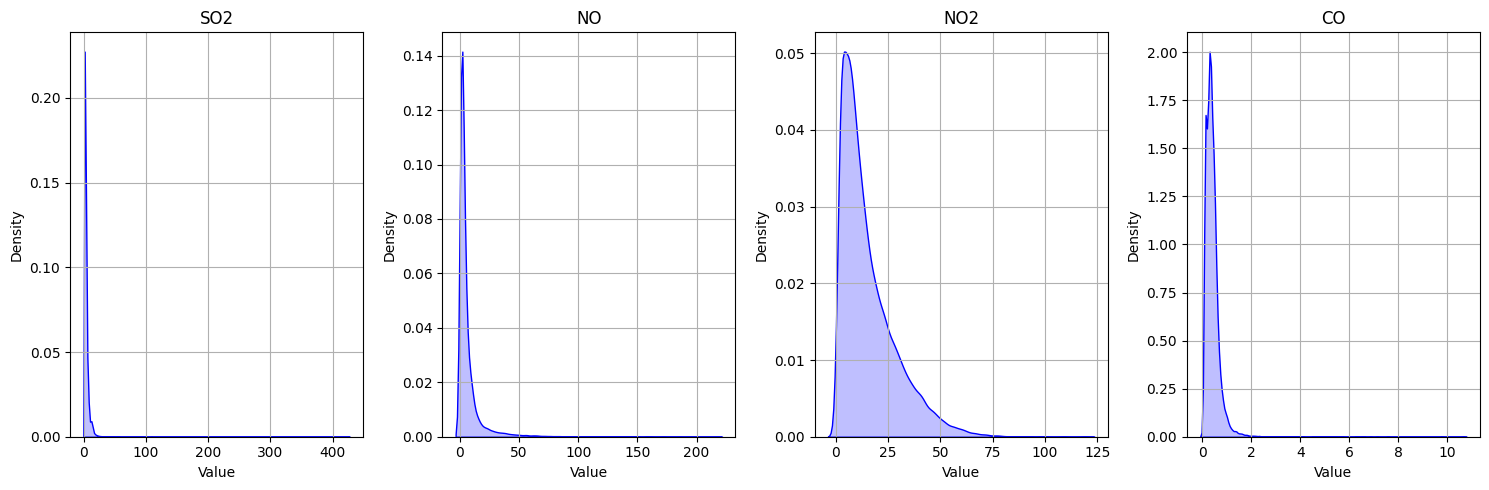

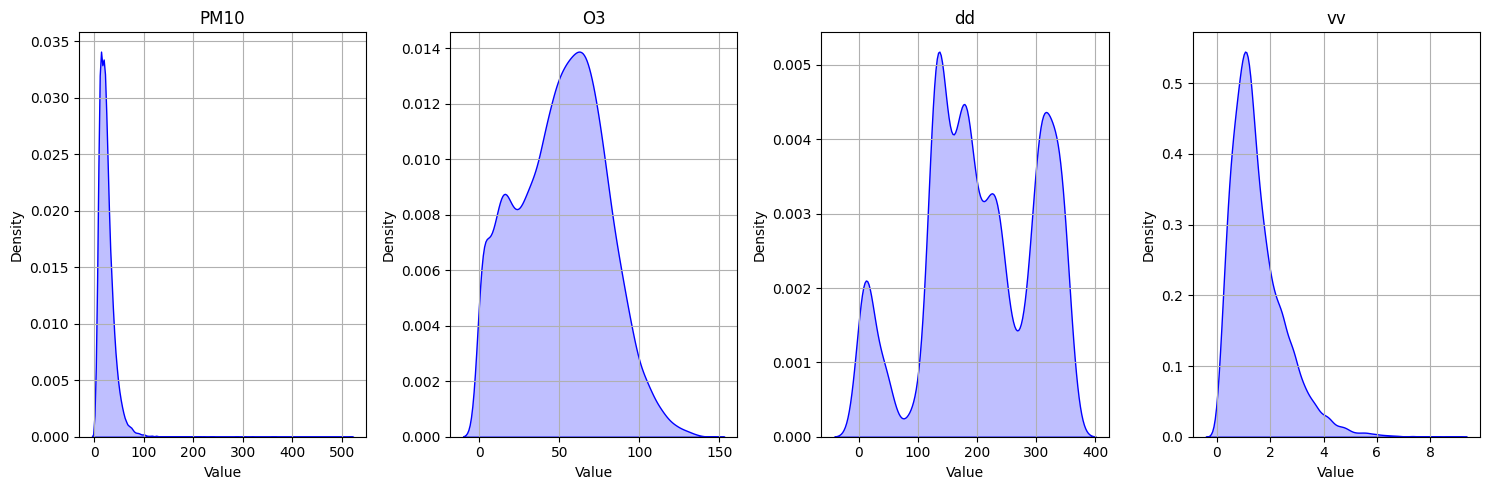

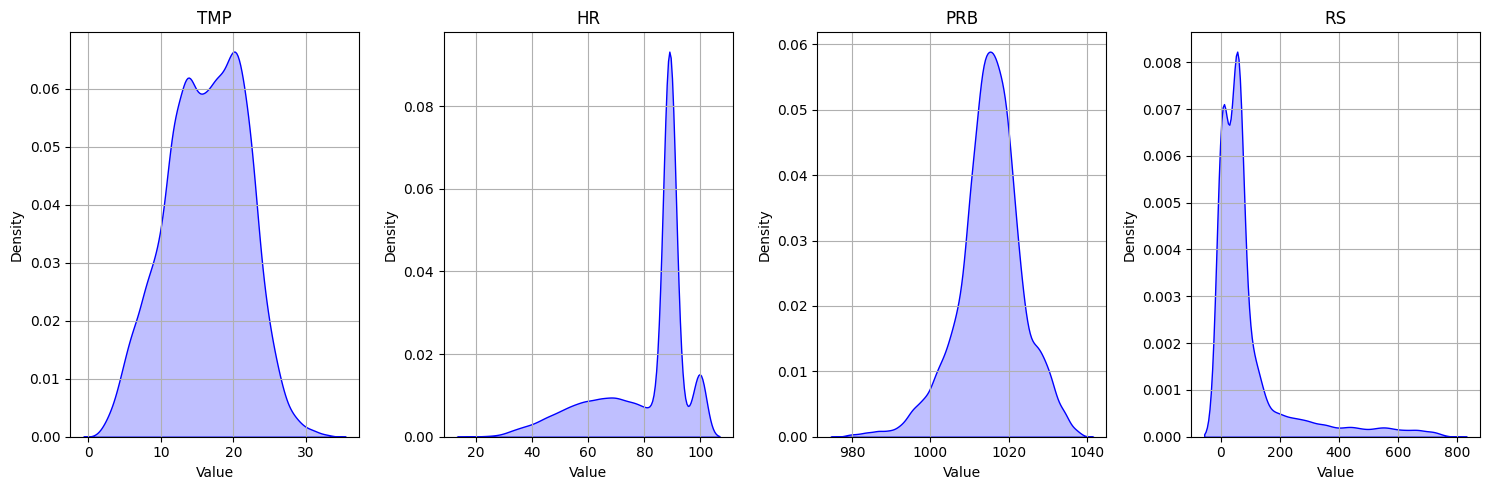

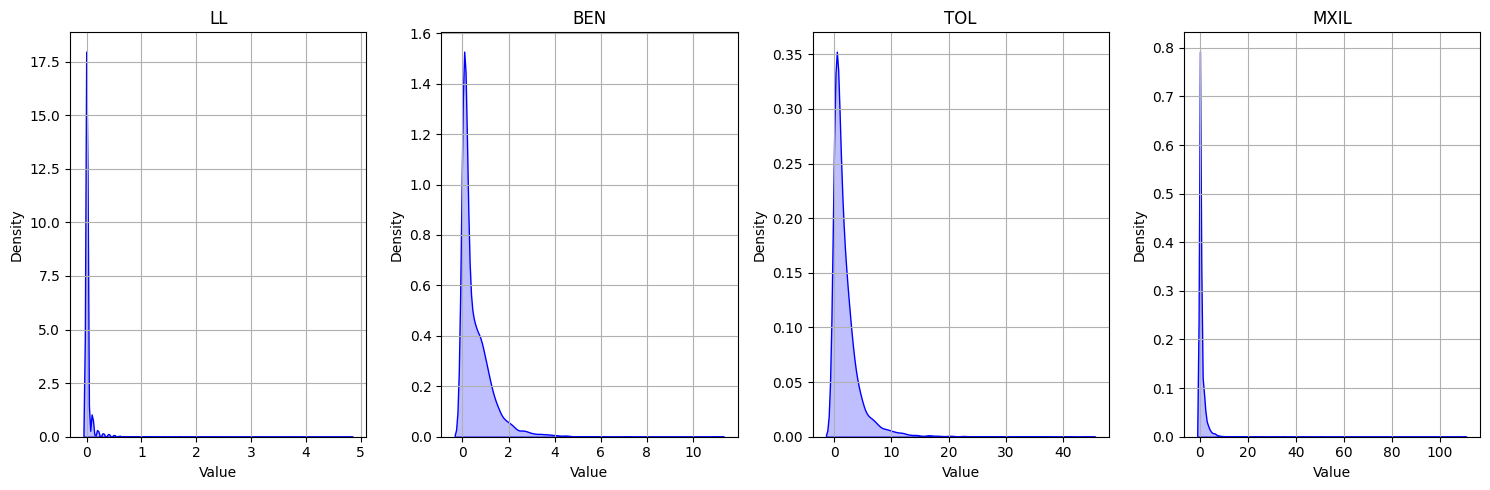

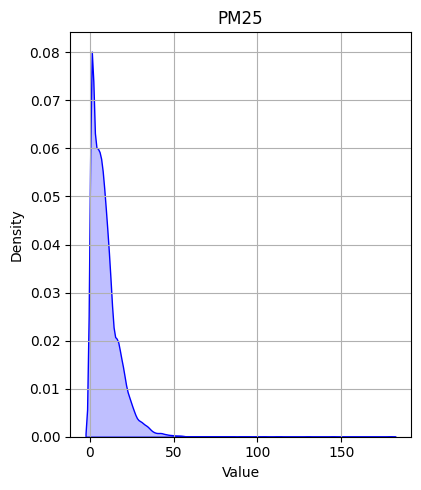

In [9]:
from pyspark.sql.functions import when
import seaborn as sns 

# Define selected columns
selected_columns = ["SO2", "NO", "NO2", "CO", "PM10", "O3", "dd", "vv", "TMP", "HR", "PRB", "RS", "LL", "BEN", "TOL", "MXIL", "PM25"]

# Selecting numerical columns and converting them to DoubleType
numerical_columns_selected = data.select(
    *[col(column).cast("double").alias(column) for column in selected_columns]
)

# Obtaining the total number of columns
total_columns = len(numerical_columns_selected.columns)

# Defining the number of columns per row
columns_per_row = 4

# Calculating the total number of rows needed
total_rows = (total_columns - 1) // columns_per_row + 1

# Iterating over the selected columns and plotting the KDE Plots to check distribution.
for i, column in enumerate(numerical_columns_selected.columns):
    if i % columns_per_row == 0:
        plt.figure(figsize=(15, 5))
    plt.subplot(1, columns_per_row, i % columns_per_row + 1)
    sns.kdeplot(numerical_columns_selected.select(column).toPandas()[column], color="blue", fill=True)
    plt.title(column)
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.grid(True)
    if (i + 1) % columns_per_row == 0 or i == total_columns - 1:
        plt.tight_layout()
        plt.show()



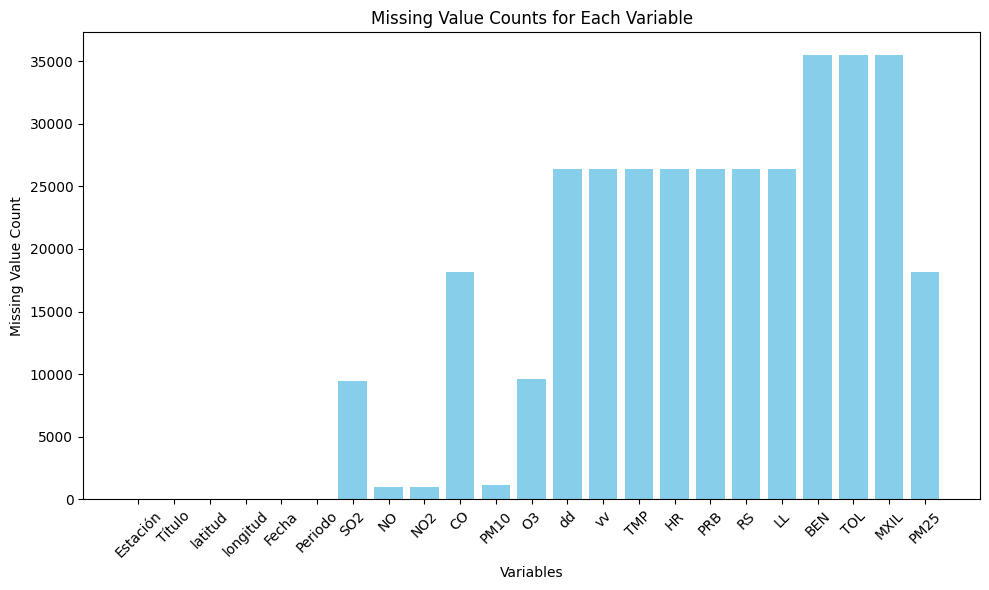

In [10]:
from pyspark.sql.functions import mean

# Handle missing values
missing_counts = data.select([col(c).isNull().cast("int").alias(c) for c in data.columns]) \
    .agg(*[sum(col(c)).alias(c) for c in data.columns])

# Convert missing counts to Pandas DataFrame for easier plotting
missing_counts_pd = missing_counts.toPandas().transpose()
missing_counts_pd.columns = ['missing_count']

# Plot missing value counts
plt.figure(figsize=(10, 6))
plt.bar(missing_counts_pd.index, missing_counts_pd['missing_count'], color='skyblue')
plt.xlabel('Variables')
plt.ylabel('Missing Value Count')
plt.title('Missing Value Counts for Each Variable')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# Check for null values in each column
null_counts = data.select([sum(col(c).isNull().cast("int")).alias(c) for c in data.columns])

# Show the results to verify there is not missing values
null_counts.show()

+--------+------+-------+--------+-----+-------+----+---+---+-----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|Estación|Título|latitud|longitud|Fecha|Periodo| SO2| NO|NO2|   CO|PM10|  O3|   dd|   vv|  TMP|   HR|  PRB|   RS|   LL|  BEN|  TOL| MXIL| PM25|
+--------+------+-------+--------+-----+-------+----+---+---+-----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|       0|     0|      0|       0|    0|      0|9435|961|960|18150|1162|9574|26356|26356|26356|26356|26356|26356|26356|35532|35532|35532|18195|
+--------+------+-------+--------+-----+-------+----+---+---+-----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+



In [12]:
# Dropping columns BEN, TOL, MXIL with the higher missing values
data = data.drop("BEN", "TOL", "MXIL", "CO")


In [13]:
# Columns for mean filling
columns_to_fill_with_mean = ['O3', 'dd', 'TMP', 'PRB',"HR"]

# Calculate mean values for specific columns
mean_values = data.agg(*(mean(col(c)).alias(c) for c in columns_to_fill_with_mean)).collect()[0].asDict()

# Fill missing values with mean for specific columns directly in the original DataFrame
data = data.fillna(mean_values, subset=columns_to_fill_with_mean)


In [14]:
from pyspark.sql.functions import lag, lead
from pyspark.sql.window import Window

# Columns for interpolation
columns_to_interpolate = ['SO2', 'NO', 'NO2', 'PM10', 'vv', 'RS', 'LL', 'PM25']

# Sort DataFrame by timestamp column
data_sorted = data.orderBy("Fecha")

# Define the window specification for interpolation
windowSpec = Window.orderBy("Fecha")

# Linear interpolation for specific columns
for column in columns_to_interpolate:
    # Create a temporary alias for the column
    temp_column = col(column).alias("temp_" + column)
    
    # Perform linear interpolation
    data_sorted = data_sorted.withColumn(column,
        when(col(column).isNull(),
            (lag(temp_column).over(windowSpec) + lead(temp_column).over(windowSpec)) / 2
        ).otherwise(col(column))
    )

# Drop temporary columns
data_sorted = data_sorted.drop(*["temp_" + column for column in columns_to_interpolate])

In [15]:
# Extract values from data_sorted as a dictionary
fill_values = {column: data_sorted.select(column).collect()[0][column] for column in columns_to_interpolate}

# Fill missing values in the original DataFrame with corresponding values from data_sorted
for column in columns_to_interpolate:
    data = data.fillna(fill_values[column], subset=[column])

In [16]:
# Check for null values in each column
null_counts = data.select([sum(col(c).isNull().cast("int")).alias(c) for c in data.columns])

# Show the results to verify there is not missing values
null_counts.show()

+--------+------+-------+--------+-----+-------+---+---+---+----+---+---+---+---+---+---+---+---+----+
|Estación|Título|latitud|longitud|Fecha|Periodo|SO2| NO|NO2|PM10| O3| dd| vv|TMP| HR|PRB| RS| LL|PM25|
+--------+------+-------+--------+-----+-------+---+---+---+----+---+---+---+---+---+---+---+---+----+
|       0|     0|      0|       0|    0|      0|  0|  0|  0|   0|  0|  0|  0|  0|  0|  0|  0|  0|   0|
+--------+------+-------+--------+-----+-------+---+---+---+----+---+---+---+---+---+---+---+---+----+



In [17]:
#create pandas dataframe

# Convert PySpark DataFrame to pandas DataFrame
pandas_df = data.toPandas()


# Save the pandas DataFrame to a CSV file
pandas_df.to_csv('clean_quality_data.csv', index=False)


In [18]:
# Finish the SparkSession
spark.stop()
